In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
tweet_df = pd.read_csv('tw.csv')

In [3]:
tweet_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [6]:
def data_preprocessing(tweet):
    tweet = tweet.lower()
    tweet = re.sub('https?://\S+|www\.\S+','',tweet,flags=re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','',tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet_tokens = word_tokenize(tweet)
    flitered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(flitered_tweets)

In [7]:
tweet_df.tweet = tweet_df['tweet'].apply(data_preprocessing)

In [8]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [9]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [10]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

In [11]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

user father dysfunctional selfish drags kids dysfunction run 

user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time urð ðððð ððð 

factsguide society motivation 



In [12]:
tweet_df['label'].value_counts()

label
0    27380
1     1993
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

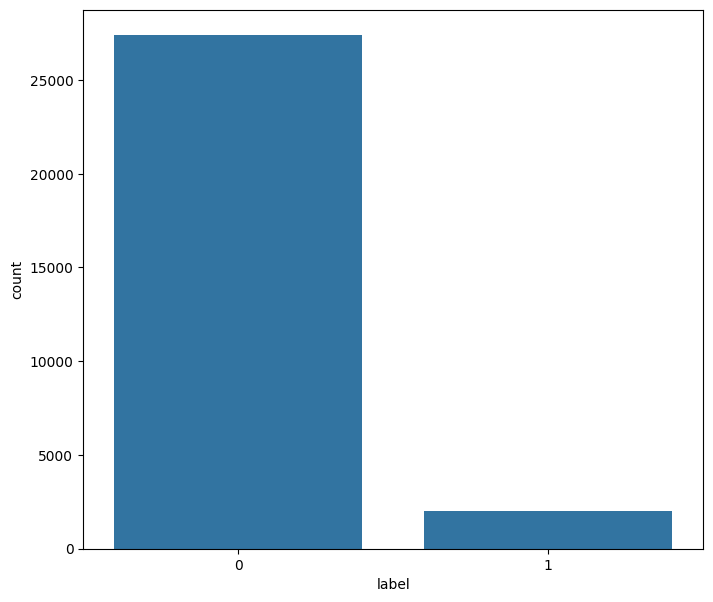

In [13]:
fig = plt.figure(figsize=(8,7))
sns.countplot(x='label',data=tweet_df)

In [31]:
from imblearn.over_sampling import SMOTE # synthetic minority oversampling technique
smote = SMOTE()
X,Y=smote.fit_resample(X,Y)

  File "C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


<Axes: xlabel='label', ylabel='count'>

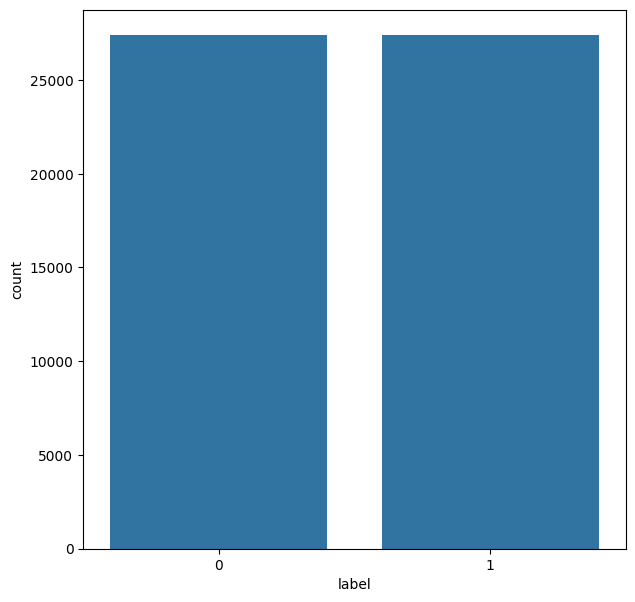

In [34]:
plt.figure(figsize=(7,7))
sns.countplot(x=Y)

Text(0.5, 1.0, 'Distribution Of Sentiments')

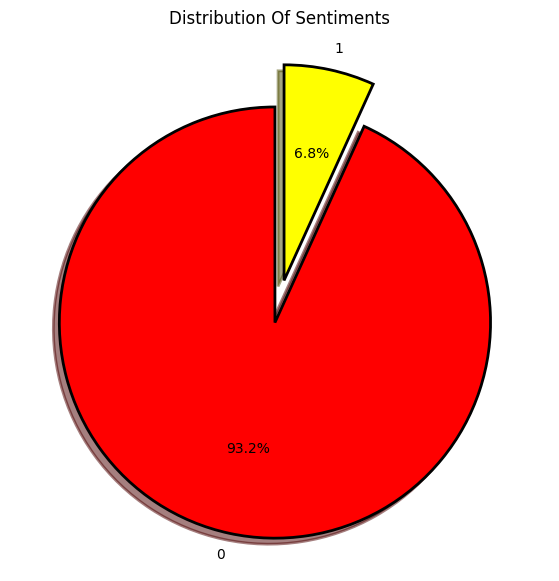

In [35]:
fig = plt.figure(figsize=(8,7))
colors = ("red",'yellow')
wp = {'linewidth':2,'edgecolor':'black'}
tags = tweet_df['label'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution Of Sentiments')

In [36]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time urð ðððð ððð
4,5,0,factsguide society motivation


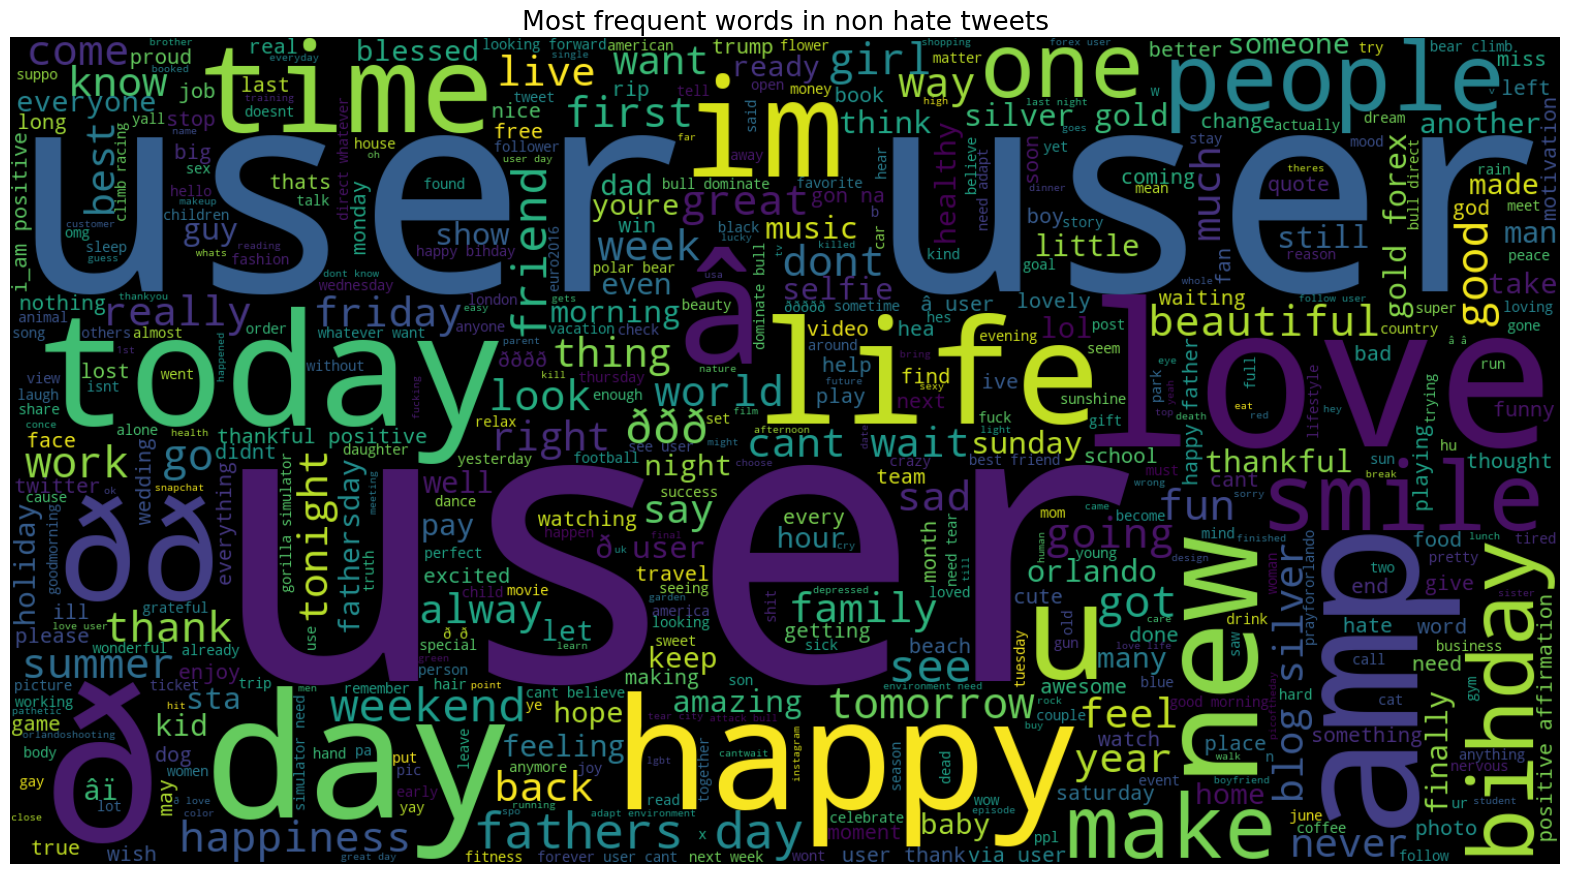

In [37]:
text =  ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1500,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets',fontsize=19)
plt.show()

In [38]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [39]:
feature_names = vect.get_feature_names_out()
print("Number of features : {}\n".format(len(feature_names)))
print("First 20 features : {}\n".format(feature_names[:20]))

Number of features : 212008

First 20 features : ['0000001' '0000001 polluting' '00027' '00027 photooftheday' '001' '0035'
 '00h30' '01' '01 4995' '01 7900' '01 blog' '01 croatia' '01 may'
 '01 shopalyssas' '0115' '0115 8599968' '0161' '0161 manny' '019'
 '019 previous']



In [40]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [42]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [43]:
Y_pred = clf.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.9395744680851064

In [45]:
f1_score(Y_test,Y_pred)

0.5196211096075778

In [46]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[5328,  127],
       [ 228,  192]], dtype=int64)

In [47]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5455
           1       0.60      0.46      0.52       420

    accuracy                           0.94      5875
   macro avg       0.78      0.72      0.74      5875
weighted avg       0.93      0.94      0.94      5875



<Axes: >

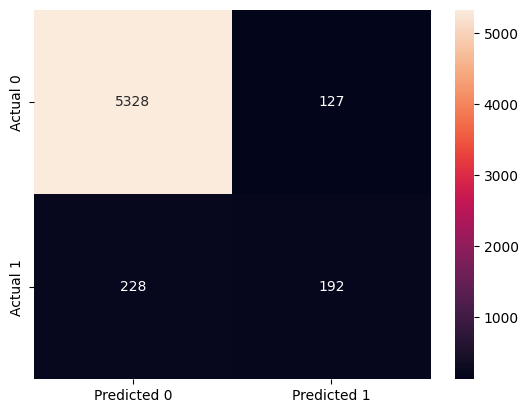

In [48]:
sns.heatmap(cm,annot=True,fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

In [49]:
import pickle

filename = 'hate_model.pkl'
pickle.dump(clf,open(filename,'wb'))

In [50]:
loaded_model = pickle.load(open('hate_model.pkl','rb'))

In [54]:
filename = 'tfidf_vectorizer.pkl'
pickle.dump(clf,open(filename,'wb'))
vectorizer  = pickle.load(open('tfidf_vectorizer.pkl','rb'))